
# Sentiment Analysis 

Objectius

    Realitzar mineria de texts.
    Interpretació dels textos.
    Anàlisis dels resultats.

### Foreword
Since the aim of this exercise is to get sentiment from text, and specially reviews, I thought opportune to pay homage to the oldest known customer review of the story, wich is the Ea-Nasir clay table dated from 1750 B.C. In wich basically a really angry merchant called Nanni wrote down all his customer frustration aimed to a copper merchant named Nasir.

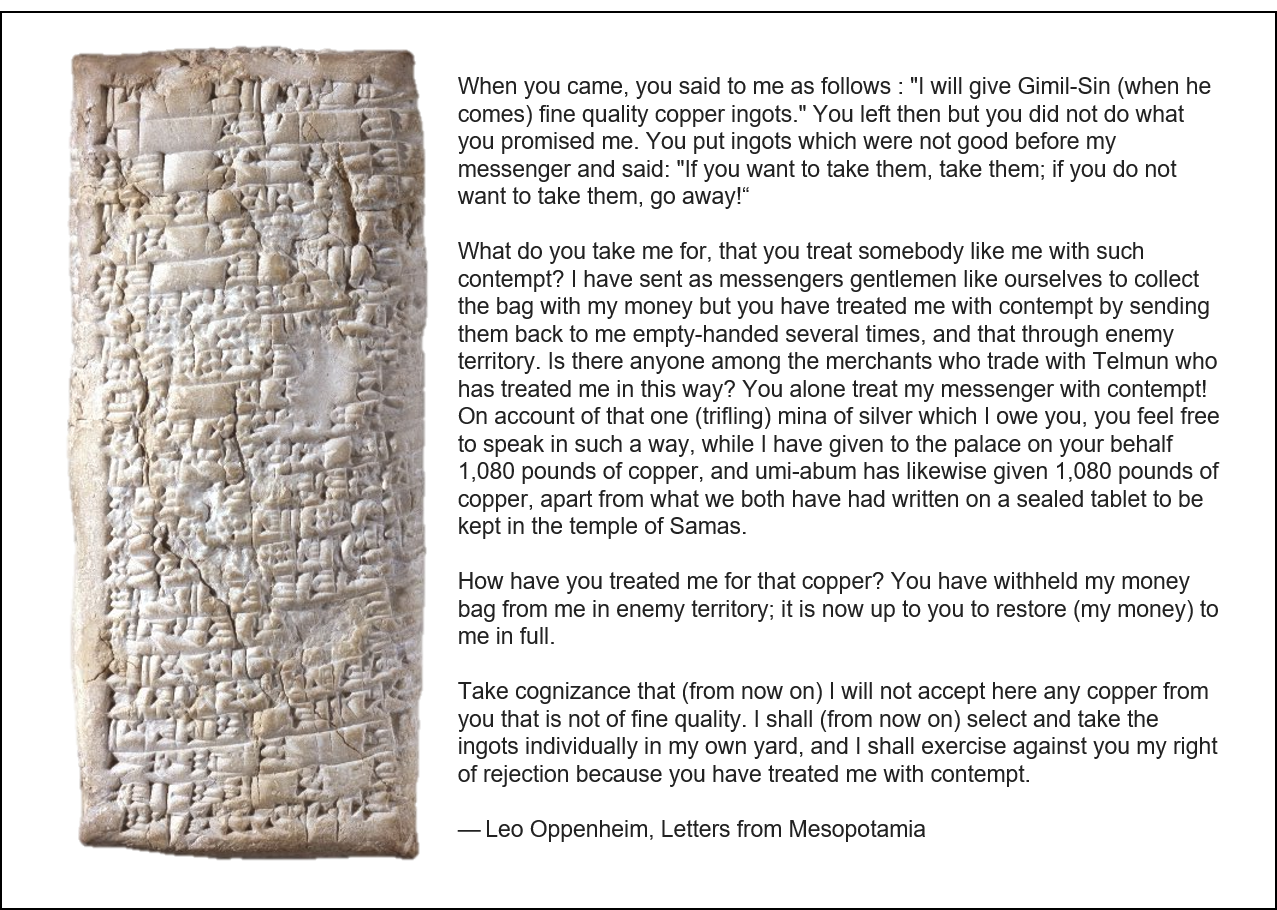


### Imports


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer




## Exercici 1
___

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.


### Tokenize words


['Tell', 'Ea-nasir', 'that', 'Nanni', 'sends', 'the', 'following', 'message', ':', 'When', 'you', 'arrived', ',', 'you', 'told', 'me', 'the', 'following', ':', '``', 'I', 'will', 'give', 'Gimil-Sin', '(', 'when', 'he', 'comes', ')', 'good', 'quality', 'copper', 'ingots', "''", '.', 'You', 'left', 'then', ',', 'but', 'you', 'did', 'not', 'do', 'what', 'you', 'promised', '.', 'You', 'put', 'ingots', 'that', 'were', 'not', 'good', 'before', 'my', 'messenger', '(', 'Sit-Sin', ')', 'and', 'said', ':', '``', 'If', 'you', 'want', 'to', 'take', 'them', ',', 'take', 'them', ';', 'if', 'you', 'do', 'not', 'want', 'to', 'take', 'them', ',', 'go', '!', "''", 'What', 'do', 'you', 'take', 'me', 'for', ',', 'that', 'you', 'treat', 'someone', 'like', 'me', 'with', 'such', 'contempt', '?', 'I', 'have', 'sent', 'knights', 'like', 'us', 'as', 'messengers', 'to', 'collect', 'the', 'bag', 'with', 'my', 'money', '(', 'which', 'I', 'had', 'deposited', 'with', 'you', ')', ',', 'but', 'you', 'have', 'treated',

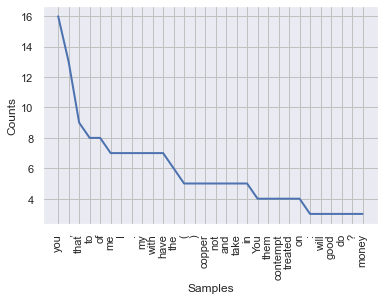

In [2]:
text = 'Tell Ea-nasir that Nanni sends the following message: When you arrived, you told me the following: "I will give Gimil-Sin (when he comes) good quality copper ingots". You left then, but you did not do what you promised. You put ingots that were not good before my messenger (Sit-Sin) and said: "If you want to take them, take them; if you do not want to take them, go!" What do you take me for, that you treat someone like me with such contempt? I have sent knights like us as messengers to collect the bag with my money (which I had deposited with you), but you have treated me with contempt by sending them back empty-handed several times, and that through enemy territory. Is there any other merchant of those who trade with Telmun who has treated me this way? You alone treat my messenger with contempt! Because of that (insignificant) silver mine I owe you, you feel free to speak that way, while I have delivered to the palace in your name 1080 pounds of copper, and umi-abum has also given 1080 pounds of copper, apart from what we have both written on a sealed tablet to keep in the temple of Samas. How have you treated me for that copper? You have retained my bag of money in enemy territory; now it is up to you to restore my money in its entirety. Keep in mind that (from now on) I will not accept any copper that is not of good quality. From now on, I will select and take the bullion individually on my own ground, and exercise against you my right of rejection because you have treated me with contempt.'

tokenized_word=word_tokenize(text)
print(tokenized_word)

fdist = FreqDist(tokenized_word)
print(fdist)

# Frequency Distribution Plot
sb.set()
ax = fdist.plot(30,cumulative=False)
plt.show()
plt.close()


## Exercici 2
___

Treu les stopwords i realitza stemming al teu conjunt de dades.

In [3]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'doesn', "hadn't", 'why', 'when', 'more', 'over', 'because', 'shan', 'wouldn', 'ain', 'shouldn', 'into', 'couldn', 'once', 're', 'our', 'what', 'in', 'here', 'or', 'my', "needn't", 'i', "wouldn't", "aren't", 'other', 'd', 'of', 'he', 'won', 'there', 'am', 'for', 'o', 'their', 'out', 'if', "isn't", 'these', 'we', "weren't", "mightn't", "mustn't", 'she', 'how', 'this', 'above', 'an', 'will', "shouldn't", 'on', "you'd", 'off', 'down', 'itself', 'any', 'ourselves', 'then', 'you', 'before', 'about', 'was', 'so', 'now', "it's", "wasn't", 'against', 'mightn', 'were', 'll', 'that', 'wasn', 'whom', 'being', "didn't", 'during', 'hers', 'by', 'should', 'himself', 'myself', 'yourself', "you've", "that'll", 'did', 'having', 'her', 'have', 'each', 'm', 'under', 'few', "you're", 'those', 'ours', 's', "should've", 'been', 't', 'yours', 'after', 'themselves', 'same', 'but', 'most', 'just', 'do', 'not', 'it', 'your', 'yourselves', 'has', 'only', 'both', 'hadn', 'didn', 'which', 'they', "won't", 'needn'

Removing Stopwords

Tokenized Sentence:
 ['Tell Ea-nasir that Nanni sends the following message: When you arrived, you told me the following: "I will give Gimil-Sin (when he comes) good quality copper ingots".', 'You left then, but you did not do what you promised.', 'You put ingots that were not good before my messenger (Sit-Sin) and said: "If you want to take them, take them; if you do not want to take them, go!"', 'What do you take me for, that you treat someone like me with such contempt?', 'I have sent knights like us as messengers to collect the bag with my money (which I had deposited with you), but you have treated me with contempt by sending them back empty-handed several times, and that through enemy territory.', 'Is there any other merchant of those who trade with Telmun who has treated me this way?', 'You alone treat my messenger with contempt!', 'Because of that (insignificant) silver mine I owe you, you feel free to speak that way, while I have delivered to the palace in your name 1080 pound

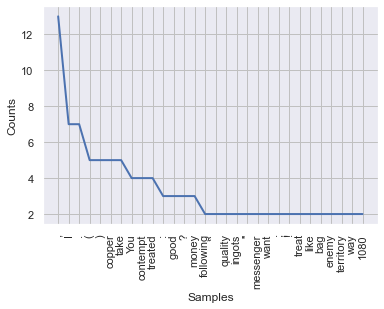

In [4]:

filtered_sent=[]
tokenized_sent = sent_tokenize(text)
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:\n", tokenized_sent)
print("\nFiltered Sentence:\n",filtered_sent)

fdist = FreqDist(filtered_sent)
print(fdist)

# Frequency Distribution Plot
sb.set()
ax = fdist.plot(30,cumulative=False)
plt.show()
plt.close()

Lexicon Normalize with Stemming

In [5]:
snowball_stemmed_words = []
snst = SnowballStemmer('english')
for w in filtered_sent:
    snowball_stemmed_words.append(snst.stem(w))

print("\nFiltered Sentence:\n",filtered_sent)
print("\nSnowball-Stemmed Sentence:\n",snowball_stemmed_words)


Filtered Sentence:
 ['Tell', 'Ea-nasir', 'Nanni', 'sends', 'following', 'message', ':', 'When', 'arrived', ',', 'told', 'following', ':', '``', 'I', 'give', 'Gimil-Sin', '(', 'comes', ')', 'good', 'quality', 'copper', 'ingots', "''", '.', 'You', 'left', ',', 'promised', '.', 'You', 'put', 'ingots', 'good', 'messenger', '(', 'Sit-Sin', ')', 'said', ':', '``', 'If', 'want', 'take', ',', 'take', ';', 'want', 'take', ',', 'go', '!', "''", 'What', 'take', ',', 'treat', 'someone', 'like', 'contempt', '?', 'I', 'sent', 'knights', 'like', 'us', 'messengers', 'collect', 'bag', 'money', '(', 'I', 'deposited', ')', ',', 'treated', 'contempt', 'sending', 'back', 'empty-handed', 'several', 'times', ',', 'enemy', 'territory', '.', 'Is', 'merchant', 'trade', 'Telmun', 'treated', 'way', '?', 'You', 'alone', 'treat', 'messenger', 'contempt', '!', 'Because', '(', 'insignificant', ')', 'silver', 'mine', 'I', 'owe', ',', 'feel', 'free', 'speak', 'way', ',', 'I', 'delivered', 'palace', 'name', '1080', 'po

Part-of-Speech tagging 

In [6]:
nltk.pos_tag(filtered_sent)

[('Tell', 'VB'),
 ('Ea-nasir', 'NNP'),
 ('Nanni', 'NNP'),
 ('sends', 'VBZ'),
 ('following', 'JJ'),
 ('message', 'NN'),
 (':', ':'),
 ('When', 'WRB'),
 ('arrived', 'VBN'),
 (',', ','),
 ('told', 'VBD'),
 ('following', 'NN'),
 (':', ':'),
 ('``', '``'),
 ('I', 'PRP'),
 ('give', 'VBP'),
 ('Gimil-Sin', 'NNP'),
 ('(', '('),
 ('comes', 'VBZ'),
 (')', ')'),
 ('good', 'JJ'),
 ('quality', 'NN'),
 ('copper', 'NN'),
 ('ingots', 'NNS'),
 ("''", "''"),
 ('.', '.'),
 ('You', 'PRP'),
 ('left', 'VBD'),
 (',', ','),
 ('promised', 'VBD'),
 ('.', '.'),
 ('You', 'PRP'),
 ('put', 'VBP'),
 ('ingots', 'NNS'),
 ('good', 'JJ'),
 ('messenger', 'NN'),
 ('(', '('),
 ('Sit-Sin', 'NNP'),
 (')', ')'),
 ('said', 'VBD'),
 (':', ':'),
 ('``', '``'),
 ('If', 'IN'),
 ('want', 'JJ'),
 ('take', 'NN'),
 (',', ','),
 ('take', 'VBP'),
 (';', ':'),
 ('want', 'JJ'),
 ('take', 'NN'),
 (',', ','),
 ('go', 'VB'),
 ('!', '.'),
 ("''", "''"),
 ('What', 'WP'),
 ('take', 'VB'),
 (',', ','),
 ('treat', 'VB'),
 ('someone', 'NN'),
 ('lik

lemmatizing also reduces words to their linguistically correct base word having in mind the context

In [7]:
lem = WordNetLemmatizer()

lemmatized_words = []
for w in snowball_stemmed_words:
    lemmatized_words.append(lem.lemmatize(w))
    
print("\nLemmatized words:\n",lemmatized_words)


Lemmatized words:
 ['tell', 'ea-nasir', 'nanni', 'send', 'follow', 'messag', ':', 'when', 'arriv', ',', 'told', 'follow', ':', '``', 'i', 'give', 'gimil-sin', '(', 'come', ')', 'good', 'qualiti', 'copper', 'ingot', "''", '.', 'you', 'left', ',', 'promis', '.', 'you', 'put', 'ingot', 'good', 'messeng', '(', 'sit-sin', ')', 'said', ':', '``', 'if', 'want', 'take', ',', 'take', ';', 'want', 'take', ',', 'go', '!', "''", 'what', 'take', ',', 'treat', 'someon', 'like', 'contempt', '?', 'i', 'sent', 'knight', 'like', 'u', 'messeng', 'collect', 'bag', 'money', '(', 'i', 'deposit', ')', ',', 'treat', 'contempt', 'send', 'back', 'empty-hand', 'sever', 'time', ',', 'enemi', 'territori', '.', 'is', 'merchant', 'trade', 'telmun', 'treat', 'way', '?', 'you', 'alon', 'treat', 'messeng', 'contempt', '!', 'becaus', '(', 'insignific', ')', 'silver', 'mine', 'i', 'owe', ',', 'feel', 'free', 'speak', 'way', ',', 'i', 'deliv', 'palac', 'name', '1080', 'pound', 'copper', ',', 'umi-abum', 'also', 'given', 


## Exercici 3
___

Realitza sentiment analysis al teu conjunt de dades.

We'll use SentimentIntensityAnalyzer, this way we can input complete sentences to him and then compute a global average Sentiment for the whole text.

In [8]:
sentiments = SentimentIntensityAnalyzer()

df = pd.DataFrame(tokenized_sent, columns=['sentence'])
df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['sentence']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['sentence']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['sentence']]
df['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in df['sentence']]
display(df)

,sentence,Positive,Negative,Neutral,Compound
0,Tell Ea-nasir that Nanni sends the following m...,0.100,0.000,0.900,0.4404
1,"You left then, but you did not do what you pro...",0.245,0.000,0.755,0.5023
2,You put ingots that were not good before my me...,0.090,0.074,0.836,-0.2728
3,"What do you take me for, that you treat someon...",0.248,0.181,0.571,0.1027
4,I have sent knights like us as messengers to c...,0.037,0.213,0.749,-0.8807
5,Is there any other merchant of those who trade...,0.000,0.000,1.000,0.0000
6,You alone treat my messenger with contempt!,0.211,0.476,0.313,-0.5255
7,Because of that (insignificant) silver mine I ...,0.059,0.000,0.941,0.5106
8,How have you treated me for that copper?,0.000,0.000,1.000,0.0000
9,You have retained my bag of money in enemy ter...,0.123,0.131,0.746,-0.2960


In [9]:
score = df['Compound'].values
sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append('Positive')
    elif i <= -0.05:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
        
df['Sentiment'] = sentiment
df.filter(['sentence','Sentiment'])

,sentence,Sentiment
0,Tell Ea-nasir that Nanni sends the following m...,Positive
1,"You left then, but you did not do what you pro...",Positive
2,You put ingots that were not good before my me...,Negative
3,"What do you take me for, that you treat someon...",Positive
4,I have sent knights like us as messengers to c...,Negative
5,Is there any other merchant of those who trade...,Neutral
6,You alone treat my messenger with contempt!,Negative
7,Because of that (insignificant) silver mine I ...,Positive
8,How have you treated me for that copper?,Neutral
9,You have retained my bag of money in enemy ter...,Negative


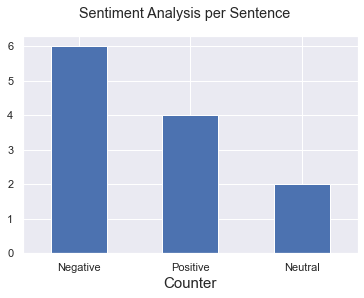

In [10]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.suptitle('Sentiment Analysis per Sentence')
plt.xlabel('Counter',fontsize=15)
plt.xticks(rotation=0)
plt.show()
plt.close()

>Once the text is labeled we can see the algorithm has efficiently determined that most of the text expresses negative sentiments. Wich is true indeed.

>Although if we take a deeper look we can see that there are some forms of severe misclassification, like;
>- Sentence nº1 :**'You left then, but you did not do what you promised.'** (*This was misclassified as positive although it clearly reproaches Ea-Nasir breaking his promise.*)
>- Sentence nº3 :**'What do you take me for, that you treat someone like me with such contempt?'** (*This was misclassified as positive yet the act of Consider someone or something to be unworthy of respect or attention doesn't quite fit with any good sensation whatsoever*)


We correct the cells to plot the real values 

In [11]:
df.at[1,'Sentiment'] = 'Negative'
df.at[3,'Sentiment'] = 'Negative'

Plot the data with the corrected values

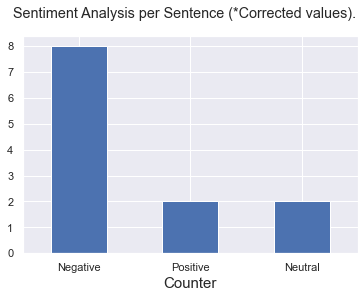

In [12]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.suptitle('Sentiment Analysis per Sentence (*Corrected values).')
plt.xlabel('Counter', fontsize=15)
plt.xticks(rotation=0)
plt.show()
plt.close()

>Finally...what would the review look like nowadays?

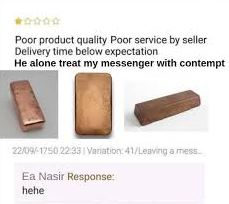